In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from scipy import optimize

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
from simul_functions import get_random_vars,S_i,S_ref,rndm, S_i_fit

In [3]:
#true_values, for now I just took approx the value of a point on the graph 
#in the other notebook

mydata=get_random_vars(1000)

S125_T=mydata.S
theta_T= np.arccos(np.sqrt(mydata.cos2)) 

sigma_S=0.1*S125_T
sigma_theta=1.5

/home/noemie/stage/simul_functions.py:50: RuntimeWarning: invalid value encountered in log10
  data['lgS'] = np.log10(data.S)


ValueError: scale < 0

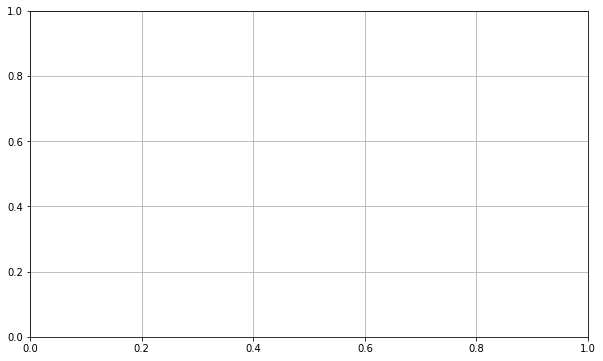

In [23]:
#generating N data sets
fig2, ax2 = plt.subplots(figsize=(10,6))
plt.grid()

ref_intensity =50
S_list=[]
S_2_list=[]
#S125=np.random.normal(S125_T[80], sigma_S[80],N)
#plt.hist(S125, bins=50, normed=True )
#plt.show()
ref_intensity=50

for i in range(len(S125_T)):
    S125=np.random.normal(S125_T[i],sigma_S[i],N)
    theta=np.random.normal(theta_T[i],sigma_theta,N)

for j in range(0,m):
    data1=get_random_vars2(1000, theta, S125)
    val = mydata.loc[data1.I == ref_intensity]
    S_list.append(val.S)
    S_2_list.append(val.S**2)
    data1.drop(data1.index,  inplace=True)
    
    bins2=np.linspace(0.05,0.95,10, endpoint = True)
    att_fit2, cov2 =sp.optimize.curve_fit(S_i_fit, bins2, val.S)
    x=np.linspace(0,1, 1000)
    ax2.plot(bins2, val.S, lw=0, marker='o')
    ax2.plot(x, S_i_fit(x,att_fit2[0],att_fit2[1],att_fit2[2]))
    
S_array=np.asarray(S_list)
S_2=np.asarray(S_2_list)
S_array2=S_array.transpose()
S_2T=S_2.transpose()


plt.show()
print(type(mydata.index))

In [25]:
mean_S=[]
delta_S=[]
for i in range(0,len(S_array2)):
    mean_S.append(np.mean(S_array2[i]))
    rms.append(np.sqrt(np.sum(S_2T[i])/len(S_2T[i]))) 
    delta_S.append(np.sqrt(rms[i]**2-mean_S[i]**2))

NameError: name 'S_array2' is not defined

ValueError: operands could not be broadcast together with shapes (10,) (0,) 

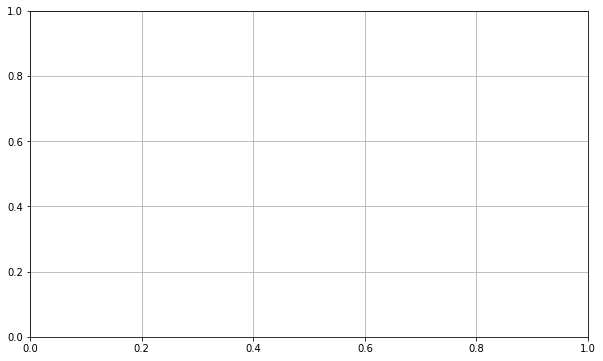

In [26]:
fig2, ax2 = plt.subplots(figsize=(10,6))
plt.grid()
sigma_S=np.asarray(delta_S)
bins2=np.linspace(0.05,0.95,10, endpoint = True)
att_fit2, cov2 =sp.optimize.curve_fit(S_i_fit, bins2, mean_S)
x=np.linspace(0,1, 1000)
ax2.plot(bins2, mean_S, lw=0, marker='o')
ax2.plot(x, S_i_fit(x,att_fit2[0],att_fit2[1],att_fit2[2]))
plt.errorbar(bins2, mean_S, xerr=None, yerr=sigma_S, fmt='o')

plt.show()